In [1]:
import keras
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 63s 0us/step


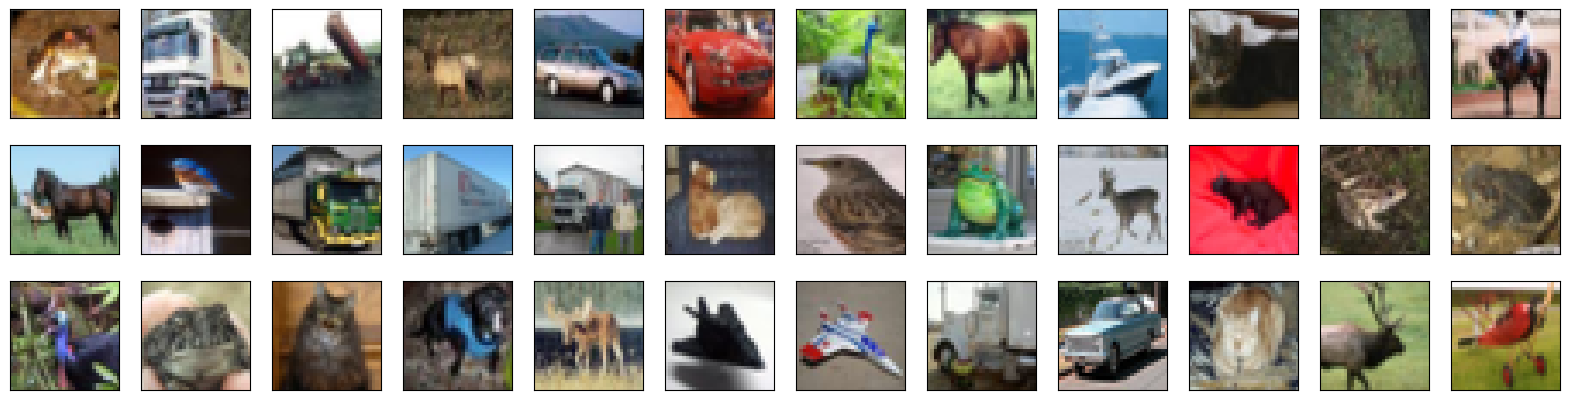

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [4]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [5]:
import tensorflow
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
model=Sequential()# model create kiye hai 
# eske bad convluation layer ko add krenge 
model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,3))) 
# eske andar 3 ya 4 chij dalna parta hai (kernel size means (filter size hota hai kernel))


# ab add krenge pooling
model.add(MaxPooling2D(pool_size=2))

# ab second convaluation layer add krte hai 
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,3))) 
# ab pooling add kr rha hu 
model.add(MaxPooling2D(pool_size=2))

# ab 3rd convaluation layer
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=2))

# ab dropout ko use kr rhe hai taki overfitting nhi hoga 
model.add(Dropout(0.3))

model.add(Flatten())


# ab pass krenge dense layer me (that is fully connect layer )
model.add(Dense(500,activation="relu"))

# eske bad bhi app dropout dal sakte ho 

model.add(Dropout(0.3))
# ab fir se dense layer denge 
model.add(Dense(10,activation="relu"))
# eske bad model ka summary dekh sakte hai 
model.summary()

C:\Users\rk318\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# ab app esko compile kro ,train kro ya jo krna hai kro 

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [9]:
from keras.callbacks import ModelCheckpoint
# training the model 

checkpointer=ModelCheckpoint(filepath="model.weights.best.keras",verbose=1,save_best_only=True)
hist=model.fit(x_train,y_train,batch_size=32,epochs=1,
               validation_data=(x_valid,y_valid),
               callbacks=[checkpointer],
               verbose=2,shuffle=True)


Epoch 1: val_loss improved from inf to 3.46474, saving model to model.weights.best.keras
1407/1407 - 21s - 15ms/step - accuracy: 0.2916 - loss: 4.2107 - val_accuracy: 0.3884 - val_loss: 3.4647


In [10]:
model.load_weights("model.weights.best.keras")

In [11]:
# get predict on the test data 
y_hat=model.predict(x_test)
# define text lebel (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


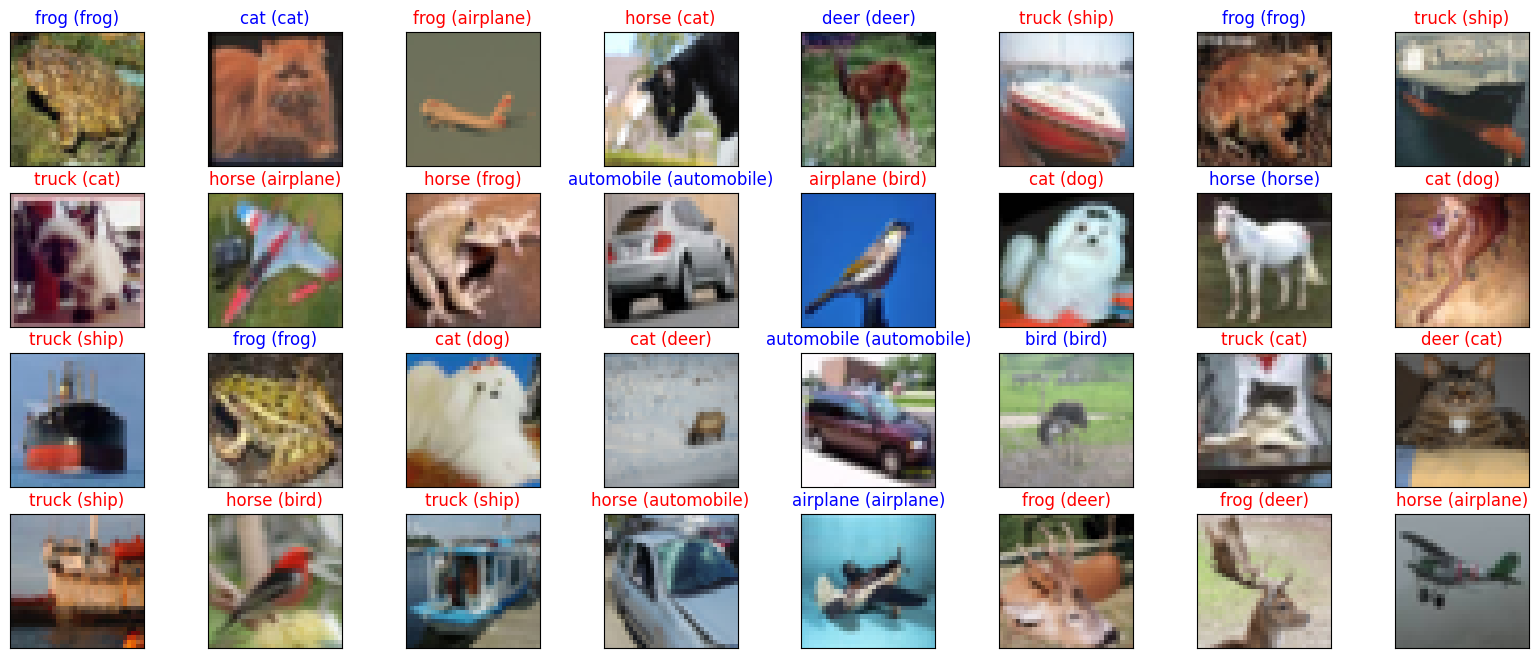

In [12]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))